# Vanilla Gradient Descent

implementation of gradient descent using only numpy

Notes:

<a href>http://cs229.stanford.edu/notes/cs229-notes1.pdf</a>

In [4]:
import numpy as np
import asyncio

In [5]:
import functools

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
dataset = {
    'size_in_feet': [
        2104,
        1416,
        1534,
        852,
        2506
    ],
    'price':[
        460,
        232,
        315,
        178,
        500
    ]
}

In [8]:
#linear function => h(x) = Theta
def linearfunction(t0, t1, x):
    linear = np.add(np.multiply(t1, x), t0)
    return linear

In [9]:
def LRM(t0, t1, xArray, yArray):
    mapped_LRM = list(map(lambda x,y: np.square(np.subtract(linearfunction(t0, t1, x),y)) , xArray, yArray))
    linear_regression_LRM = functools.reduce(lambda x,y: x+y, mapped_LRM)
    regression = np.divide(linear_regression_LRM, np.multiply(len(xArray), 2))
    
    return regression

In [10]:
#Gradient Descent
# *params:
# theta_zero => cost variable to be minimized
# theta_one => cost variable to be minimized
# learning_rate => learning rate of the gradient descent
# xArray => Array that holds the x dataset
# yArray => Array that holds the y dataset

def gradientdescent(learning_rate, xArray, yArray, theta_zero, theta_one):
    if len(xArray)!=len(yArray): return "The Arrays are not equal"     
    
    mapped_t0 = list(map(lambda x,y: np.subtract(linearfunction(theta_zero, theta_one, x),y) , xArray, yArray))
    linear_regression_t0 = functools.reduce(lambda x,y: x+y, mapped_t0)
                      
    derLRM_t0= np.divide(linear_regression_t0, len(xArray))
#     derLRM_t0 = linear_regression_t0
        
    gradient_t0 = np.subtract(theta_zero, np.multiply(learning_rate, derLRM_t0))

    mapped_t1 = list(map(lambda x,y: np.multiply(np.subtract(linearfunction(theta_zero, theta_one, x),y), x) , xArray, yArray))
    linear_regression_t1 = functools.reduce(lambda x,y: x+y, mapped_t1)
                      
    derLRM_t1 = np.divide(linear_regression_t1, len(xArray))
#     derLRM_t1 = linear_regression_t1
        
    gradient_t1 = np.subtract(theta_one, np.multiply(learning_rate, derLRM_t1))
    
    return [gradient_t0, gradient_t1]
                      

In [27]:
gradient_descent_values = {
    'gradients':{
        'theta_zero': [0],
        'theta_one': [0]
    },
    'linear_regression': []
}

In [28]:
learning_rate = 1e-7

In [29]:
for i in range(200):
    t_zero = gradient_descent_values['gradients']['theta_zero'][-1]
    t_one = gradient_descent_values['gradients']['theta_one'][-1]
    
    model = LRM(t_zero, t_one, dataset['size_in_feet'], dataset['price'])
    
    BGD = gradientdescent(learning_rate, dataset['size_in_feet'], dataset['price'], t_zero, t_one)
    
    gradient_descent_values['gradients']['theta_zero'].append(BGD[0])
    gradient_descent_values['gradients']['theta_one'].append(BGD[1])
    gradient_descent_values['linear_regression'].append(model)
    

In [30]:
gradient_descent_values

{'gradients': {'theta_one': [0,
   0.063684359999999995,
   0.10725596051310241,
   0.13706680217086026,
   0.15746280026136417,
   0.1714173454983115,
   0.18096477397668542,
   0.18749693888560318,
   0.19196611910603886,
   0.19502384532688971,
   0.19711588217347287,
   0.19854721313247639,
   0.19952650197367838,
   0.20019651238992939,
   0.20065492052317771,
   0.20096855448998024,
   0.20118313678790353,
   0.20132994986049726,
   0.2014303965472064,
   0.20149912025450203,
   0.20154613971628293,
   0.20157830955542205,
   0.20160031957156921,
   0.20161537843443,
   0.20162568145340959,
   0.201632730616505,
   0.20163755355469073,
   0.20164085335309251,
   0.20164311104887858,
   0.20164465575832352,
   0.20164571265638115,
   0.20164643580337532,
   0.20164693060438324,
   0.2016472691755086,
   0.20164750085718691,
   0.20164765940718452,
   0.20164776792190856,
   0.20164784220347159,
   0.20164789306337169,
   0.20164792789862554,
   0.20164795177012812,
   0.2016479681

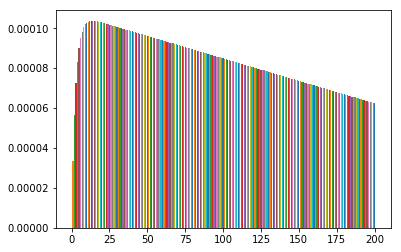

In [31]:
counter = 0
for i in range(len(gradient_descent_values['gradients']['theta_zero'])):
    plt.bar([counter], gradient_descent_values['gradients']['theta_zero'][i])
    counter += 1
plt.show()

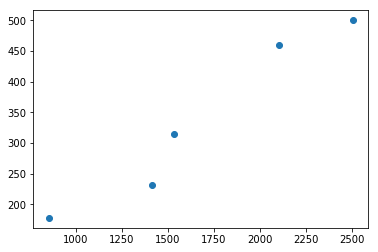

In [18]:
plt.scatter(dataset['size_in_feet'], dataset['price'])
plt.show()